**CURSO**: Análisis Geoespacial, Departamento de Geociencias y Medio Ambiente, Universidad Nacional de Colombia - sede Medellín <br/>
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, but specially from the courses and book open and freely published by [Dani Arribas-Bel](http://darribas.org/) -  University of Liverpool & - Sergio Rey - [Center for Geospatial Sciences, University of California, Riverside](http://spatial.ucr.edu/peopleRey.html). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions. 

# Geovisualization

In [11]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import geopandas as gpd
import osmnx
import contextily as cx
#from keplergl import KeplerGl
import matplotlib.pyplot as plt

We will learn how to load, manipulate and visualize spatial data. In some senses, spatial data are usually included simply as "one more column" in a table. However, *spatial is special* sometimes and there are few aspects in which geographic data differ from standard numerical tables. In the process, we will discover that, although with some particularities, dealing with spatial data in Python largely resembles dealing with non-spatial data.

## Datasets

To learn these concepts, we will be playing with three main datasets. 

### Cities

First we will use a polygon geography. We will use an open dataset that contains the boundaries of Spanish cities. We can read it into an object named `cities` by:

In [12]:
cities = gpd.read_file("https://ndownloader.figshare.com/files/20232174")
cities.head(2)

,city_id,n_buildings,geometry
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4..."
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4..."


In [14]:
cities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city_id      717 non-null    object  
 1   n_buildings  717 non-null    int64   
 2   geometry     717 non-null    geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 16.9+ KB


<AxesSubplot:>

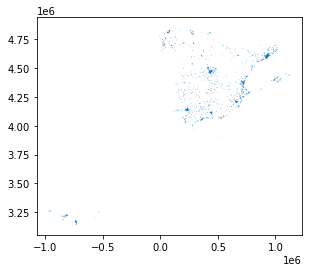

In [13]:
cities.plot()

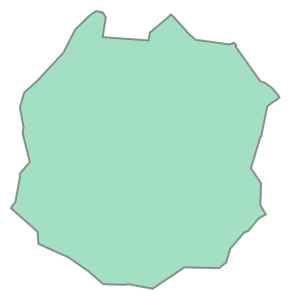

In [16]:
cities.loc[456, 'geometry']

### Streets

In addition to polygons, we will play with a line layer. For that, we are going to use a subset of street network from the Spanish city of Zaragoza. The data is available on the following web address, And you can read it into an object called streets with:

In [17]:
streets = gpd.read_file("https://github.com/geochicasosm/lascallesdelasmujeres/raw/master/data/zaragoza/final_tile.geojson")
streets.head(2)

,name,id,wikipedia_link,gender,scale,category,typeofroad,geometry
0,Calle Camilo José Cela,78317710,,Male,,None,None,"LINESTRING (-1.03303 41.72464, -1.03346 41.72474)"
1,Calle Mariano Domingo Ruiz,66375846,,Male,,None,None,"LINESTRING (-1.03161 41.72427, -1.03228 41.72347)"


<AxesSubplot:>

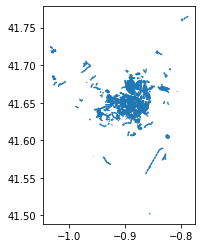

In [18]:
streets.plot()

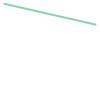

In [19]:
streets.loc[0, 'geometry']

### Bars
The final dataset we will rely on is a set of points demarcating the location of bars in Zaragoza. To obtain it, we will use `osmnx`, a Python library that allows us to query [OpenStreetMap](https://www.openstreetmap.org). Note that we use the method `pois_from_place`, which queries for points of interest (POIs, or `pois`) in a particular place (Zaragoza in this case). In addition, we can specify a set of tags to delimit the query. We use this to ask _only_ for amenities of the type "bar":

In [ ]:
pois = osmnx.geometries_from_place("Zaragoza, Spain", tags={"amenity": "bar"})
pois.head(2)

In [17]:
pois.geometry

element_type  osmid    
node          368305154                            POINT (-0.89492 41.64197)
              603129991                            POINT (-0.89185 41.64214)
              673807647                            POINT (-0.89578 41.64349)
              759470843                            POINT (-0.89101 41.66345)
              765953540                            POINT (-0.89693 41.64048)
                                                 ...                        
way           343960594    POLYGON ((-0.87728 41.66306, -0.87715 41.66303...
              492391640    POLYGON ((-0.86310 41.68922, -0.86286 41.68922...
              492391641    POLYGON ((-0.86662 41.69280, -0.86630 41.69298...
              561378477    POLYGON ((-0.79732 41.73130, -0.79763 41.73137...
              713330658    POLYGON ((-0.86976 41.65075, -0.86978 41.65078...
Name: geometry, Length: 232, dtype: geometry

In [18]:
print(pois.geometry[0])

POINT (-0.8949199 41.6419671)


Points take a similar approach for quick plotting:

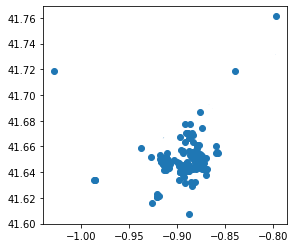

In [43]:
pois.plot();

## Styling plots

It is possible to tweak several aspects of a plot to customize if to particular needs. In this section, we will explore some of the basic elements that will allow us to obtain more compelling maps.

### Changing transparency

The intensity of color of a polygon can be easily changed through the `alpha` attribute in plot. This is specified as a value betwee zero and one, where the former is entirely transparent while the latter is the fully opaque (maximum intensity):

<AxesSubplot:>

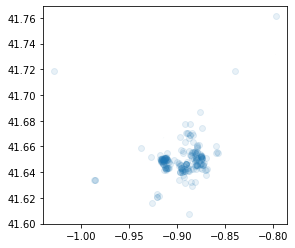

In [24]:
pois.plot(alpha=0.1)

### Removing axes

Although in some cases, the axes can be useful to obtain context, most of the times maps look and feel better without them. Removing the axes involves wrapping the plot into a figure, which takes a few more lines of aparently useless code but that, in time, it will allow you to tweak the map further and to create much more flexible designs:

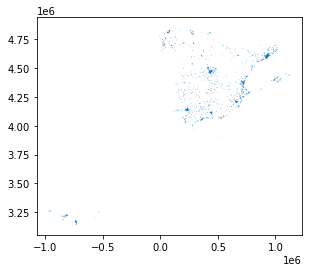

In [29]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Plot layer of polygons on the axis
cities.plot(ax=ax)
# Remove axis frames
#ax.set_axis_off()
# Display
plt.show()

### Adding a title

Adding a title is an extra line, if we are creating the plot within a figure, as we just did. To include text on top of the figure:

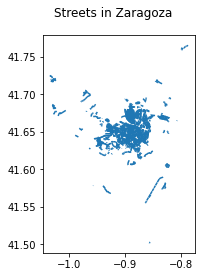

In [26]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer of polygons on the axis
streets.plot(ax=ax)
# Add figure title
f.suptitle("Streets in Zaragoza")
# Display
plt.show()

### Changing the size of the map

The size of the plot is changed equally easily in this context. The only difference is that it is specified when we create the figure with the argument `figsize`. The first number represents the width, the X axis, and the second corresponds with the height, the Y axis.

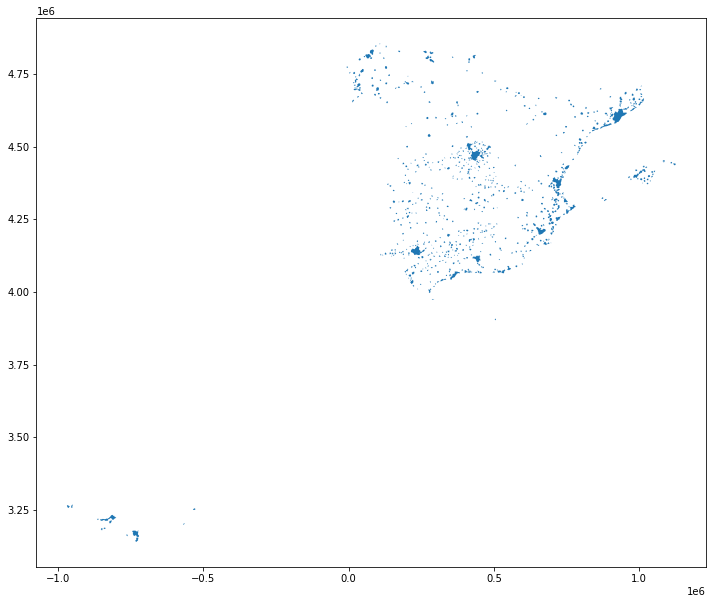

In [27]:
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis
cities.plot(ax=ax)
# Display
plt.show()

### Modifying borders

Border lines sometimes can distort or impede proper interpretation of a map. In those cases, it is useful to know how they can be modified. Although not too complicated, the way to access borders in `geopandas` is not as straightforward as it is the case for other aspects of the map, such as size or frame. Let us first see the code to make the *lines thicker* and *black*, and then we will work our way through the different steps:

<AxesSubplot:>

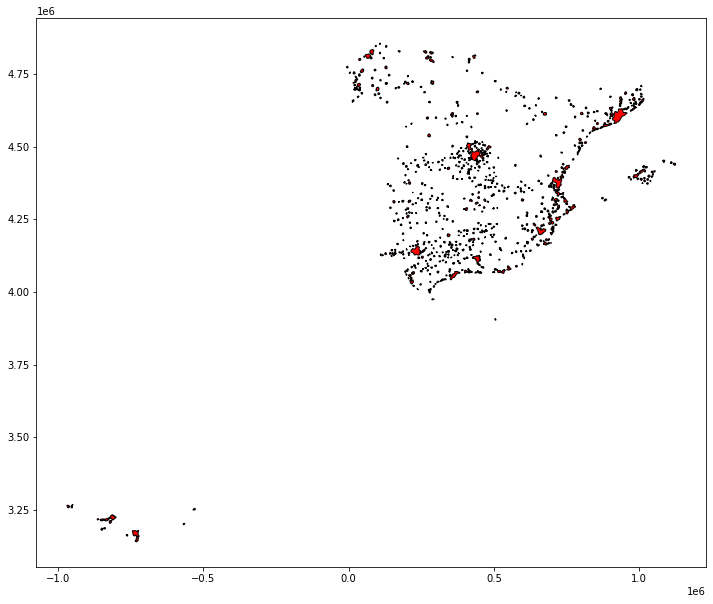

In [28]:
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))
# Add layer of polygons on the axis, set fill color (`facecolor`) and boundary
# color (`edgecolor`)
cities.plot(linewidth=1, 
            facecolor='red', 
            edgecolor='black', 
            ax=ax
           )

This approach works very similarly with other geometries, such as lines. For example, if we wanted to plot the streets in red, we would simply:

<AxesSubplot:>

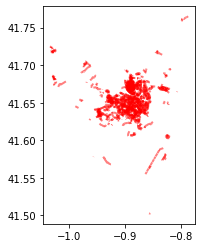

In [9]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add layer with lines, set them red and with different line width
# and append it to the axis `ax`
streets.plot(linewidth=2, color='red', alpha=0.5, ax=ax)

Important, note that in the case of lines the parameter to control the color is simply `color`. This is because lines do not have an area, so there is no need to distinguish between the main area (`facecolor`) and the border lines (`edgecolor`).

## Coordinate Reference Systems (CRS)
A coordinate reference system (CRS) determines how the two-dimensional (planar) coordinates of the geometry objects should be related to actual places on the (non-planar) earth.

For a nice in-depth explanation, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html

The coordindate reference system (CRS) is the way geographers and cartographers have to represent a three-dimentional object, such as the round earth, on a two-dimensional plane, such as a piece of paper or a computer screen. If the source data contain information on the CRS of the data, we can modify this in a GeoDataFrame.

A GeoDataFrame or GeoSeries has a .crs attribute which holds (optionally) a description of the coordinate reference system of the geometries:

In [18]:
cities.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As we can see, there is information stored about the reference system: it is using the standard Spanish projection, which is expressed in meters. There are also other less decipherable parameters but we do not need to worry about them right now.

If we want to modify this and "reproject" the polygons into a different CRS, the quickest way is to find the [EPSG](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers#European_Petroleum_Survey_Group) code online ([epsg.io](http://epsg.io/) is a good one, although there are others too). For example, if we wanted to transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:

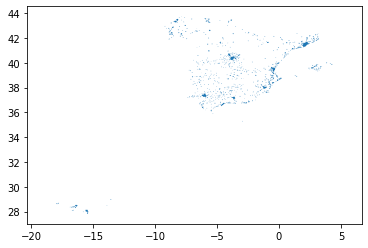

In [6]:
# Reproject (`to_crs`) and plot (`plot`) polygons
cities.to_crs(epsg=4326).plot()
# Set equal axis
lims = plt.axis('equal')

The shape of the polygons is slightly different. Furthermore, note how the *scale* in which they are plotted differs.

For more information, see also http://geopandas.readthedocs.io/en/latest/projections.html.

There are sometimes good reasons you want to change the coordinate references system of your dataset, for example:

- different sources with different crs -> need to convert to the same crs
- distance-based operations -> if you a crs that has meter units (not degrees)
- plotting in a certain crs (eg to preserve area)

We can convert a GeoDataFrame to another reference system using the to_crs function.

## Scale

[scale-bar](https://github.com/ppinard/matplotlib-scalebar) provides a new artist for matplotlib to display a scale bar, aka micron bar. It is particularly useful when displaying calibrated images plotted using plt.imshow(...).

If you are plotting geospatial coordinates (such as scatterplots of the location of structures, geopandas geodataframe plots, etc.), dx needs to be set differently depending on the coordinate system:

* For UTM based coordinate system, where the X and Y are in meters, simply set dx = 1.
* For WGS or NAD based coordinate system, where X and Y are in latitude (Y) and longitude (X), compute the distance between two points at the latitude (Y) you wish to have the scale represented and are also one full degree of longitude (X) apart, in meters. For example, dx = great_circle_distance((X, Y), (X + 1, Y))

In [116]:
import math

EARTH_CIRCUMFERENCE = 6378137     # earth circumference in meters

def great_circle_distance(latlong_a, latlong_b):
    """
    >>> coord_pairs = [
    ...     # between eighth and 31st and eighth and 30th
    ...     [(40.750307,-73.994819), (40.749641,-73.99527)],
    ...     # sanfran to NYC ~2568 miles
    ...     [(37.784750,-122.421180), (40.714585,-74.007202)],
    ...     # about 10 feet apart
    ...     [(40.714732,-74.008091), (40.714753,-74.008074)],
    ...     # inches apart
    ...     [(40.754850,-73.975560), (40.754851,-73.975561)],
    ... ]
    
    >>> for pair in coord_pairs:
    ...     great_circle_distance(pair[0], pair[1]) # doctest: +ELLIPSIS
    83.325362855055...
    4133342.6554530...
    2.7426970360283...
    0.1396525521278...
    """
    lat1, lon1 = latlong_a
    lat2, lon2 = latlong_b

    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = (math.sin(dLat / 2) * math.sin(dLat / 2) +
            math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * 
            math.sin(dLon / 2) * math.sin(dLon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = EARTH_CIRCUMFERENCE * c
    
    return d

In [117]:
X=-75
Y=6
dx = great_circle_distance((X, Y), (X + 1, Y))
dx

111319.49079327357

In [113]:
!pip install matplotlib-scalebar

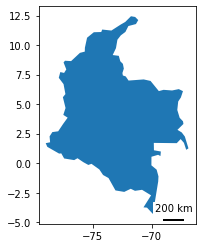

In [118]:
from matplotlib_scalebar.scalebar import ScaleBar
ax=colombia.plot()
# Create scale bar
scalebar = ScaleBar(dx, "m", location="lower right", scale_loc="top", length_fraction=0.25)
ax.add_artist(scalebar)

## Composing multi-layer maps

So far we have considered many aspects of plotting *a single* layer of data. However, in many cases, an effective map will require more than one: for example we might want to display streets on top of the polygons of neighborhoods, and add a few points for specific locations we want to highlight. At the very heart of GIS is the possibility to combine spatial information from different sources by overlaying it on top of each other, and this is fully supported in Python.

For this section, let's select only Zaragoza from the `streets` table and convert it to lat/lon so it's aligned with the streets and POIs layers:

In [20]:
zgz = cities.loc[[112], :].to_crs(epsg=4326)
zgz

,city_id,n_buildings,geometry
112,ci122,23604,"POLYGON ((-0.93057 41.60615, -0.93092 41.60622..."


Combining different layers on a single map boils down to adding each of them to the same axis in a sequential way, as if we were literally overlaying one on top of the previous one. For example, let's plot the boundary of Zaragoza and its bars:

In [ ]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
zgz.plot(ax=ax, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=ax, alpha=0.5, color="green")

## Saving maps to figures

Once we have produced a map we are content with, we might want to save it to a file so we can include it into a report, article, website, etc. Exporting maps in Python involves replacing `plt.show` by `plt.savefig` at the end of the code block to specify where and how to save it. For example to save the previous map into a `png` file in the same folder where the notebook is hosted:

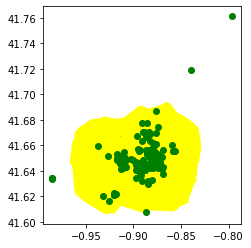

In [22]:
# Setup figure and axis
f, ax = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
zgz.plot(ax=ax, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=ax, color="green")
# Save figure to a PNG file
plt.savefig('zaragoza_bars.png')

If you now check on the folder, you'll find a `png` (image) file with the map.

The command `plt.savefig` contains a large number of options and additional parameters to tweak. Given the size of the figure created is not very large, we can increase this with the argument `dpi`, which stands for "dots per inch" and it's a standard measure of resolution in images. For example, for a high quality image, we could use 500:

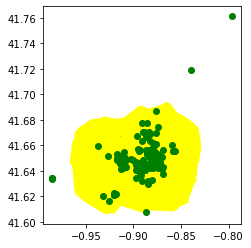

In [23]:
# Setup figure and axis
f, pepito = plt.subplots(1)
# Add a layer with polygon on to axis `ax`
zgz.plot(ax=pepito, color="yellow")
# Add a layer with lines on top in axis `ax`
pois.plot(ax=pepito, color="green")
# Save figure to a PNG file
plt.savefig('zaragoza_bars.png', dpi=500)

## Manipulating spatial tables (`GeoDataFrames`)

Once we have an understanding of how to visually display spatial information contained, let us see how it can be combined with the operations learnt in the previous session about manipulating non-spatial tabular data. Essentially, the key is to realize that a `GeoDataFrame` contains most of its spatial information in a single column named `geometry`, but the rest of it looks and behaves exactly like a non-spatial `DataFrame` (in fact, it is). This concedes them all the flexibility and convenience that we saw in manipulating, slicing, and transforming tabular data, with the bonus that spatial data is carried away in all those steps. In addition, `GeoDataFrames` also incorporate a set of explicitly spatial operations to combine and transform data. In this section, we will consider both.

`GeoDataFrame`s come with a whole range of traditional GIS operations built-in. Here we will run through a small subset of them that contains some of the most commonly used ones.

### Area calculation

One of the spatial aspects we often need from polygons is their area. "How big is it?" is a question that always haunts us when we think of countries, regions, or cities. To obtain area measurements, first make sure you `GeoDataFrame` {ref}`is projected <lab_C:to_crs>`. If that is the case, you can calculate areas as follows:

In [34]:
cities["area"] = cities.area
city_areas.head()

0    8.449666e+06
1    9.121270e+06
2    1.322653e+07
3    6.808121e+07
4    1.072284e+07
dtype: float64

In [35]:
cities.head(2)

,city_id,n_buildings,geometry,area
0,ci000,2348,"POLYGON ((385390.071 4202949.446, 384488.697 4...",8.449666e+06
1,ci001,2741,"POLYGON ((214893.033 4579137.558, 215258.185 4...",9.121270e+06


This indicates that the area of the first city in our table takes up 8,450,000 squared metres. If we wanted to convert into squared kilometres, we can divide by 1,000,000:

In [36]:
areas_in_sqkm = city_areas / 1000000
areas_in_sqkm.head()

0     8.449666
1     9.121270
2    13.226528
3    68.081212
4    10.722843
dtype: float64

(lab_C:length)=
### Length

Similarly, an equally common question with lines is their length. Also similarly, their computation is relatively straightforward in Python, provided that our data are projected. Here we will perform the projection (`to_crs`) and the calculation of the length at the same time:

In [37]:
street_length = streets.to_crs(epsg=25830).length
street_length.head()

0     37.338828
1    104.510732
2    365.969719
3     97.101436
4     94.002218
dtype: float64

Since the CRS we use (`EPSG:25830`) is expressed in metres, we can tell the first street segment is about 37m.

### Centroid calculation

Sometimes it is useful to summarize a polygon into a single point and, for that, a good candidate is its centroid (almost like a spatial analogue of the average). The following command will return a `GeoSeries` (a single column with spatial data) with the centroids of a polygon `GeoDataFrame`:

In [38]:
cents = cities.centroid
cents.head()

0    POINT (386147.759 4204605.994)
1    POINT (216296.159 4579397.331)
2    POINT (688901.588 4180201.774)
3    POINT (518262.028 4069898.674)
4    POINT (206940.936 4127361.966)
dtype: geometry

Note how `cents` is not an entire table but a single column, or a `GeoSeries` object. This means you can plot it directly, just like a table:

<AxesSubplot:>

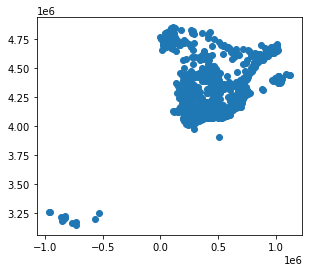

In [25]:
cents.plot()

But you don't need to call a `geometry` column to inspect the spatial objects. In fact, if you do it will return an error because there is not any `geometry` column, the object `cents` itself is the geometry.

### Point in polygon (PiP)

Knowing whether a point is inside a polygon is conceptually a straightforward exercise but computationally a tricky task to perform. The way to perform this operation in `GeoPandas` is through the `contains` method, available for each polygon object.

In [26]:
poly = cities.loc[112, "geometry"]
pt1 = cents[0]
pt2 = cents[112]

And we can perform the checks as follows:

In [27]:
poly.contains(pt1)

False

In [28]:
poly.contains(pt2)

True

Performing point-in-polygon in this way is instructive and useful for pedagogical reasons, but for cases with many points and polygons, it is not particularly efficient. In these situations, it is much more advisable to perform then as a "spatial join". If you are interested in these, see the link provided below to learn more about them.

### Buffers

Buffers are one of the classical GIS operations in which an area is drawn around a particular geometry, given a specific radious. These are very useful, for instance, in combination with point-in-polygon operations to calculate accessibility, catchment areas, etc.

For this example, we will use the bars table, but will project it to the same CRS as `cities`, so it is expressed in metres:

In [29]:
pois_projected = pois.to_crs(cities.crs)
pois_projected.crs

<Projected CRS: EPSG:25830>
Name: ETRS89 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - 6°W to 0°W and ETRS89 by country
- bounds: (-6.0, 35.26, 0.0, 80.53)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

To create a buffer using `geopandas`, simply call the `buffer` method, passing in the radious. For example, to draw a 500m. buffer around every bar in Zaragoza:

In [30]:
buf = pois_projected.buffer(500)
buf.head()

603129991    POLYGON ((676071.164 4612191.116, 676068.756 4...
673807647    POLYGON ((675740.197 4612333.309, 675737.789 4...
759470843    POLYGON ((676083.551 4614558.818, 676081.143 4...
765953540    POLYGON ((675653.012 4611997.279, 675650.604 4...
772973291    POLYGON ((675616.277 4614955.710, 675613.870 4...
dtype: geometry

And plotting it is equally straighforward:

<AxesSubplot:>

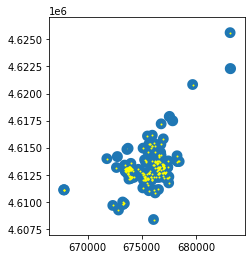

In [31]:
f, ax = plt.subplots(1)
# Plot buffer
buf.plot(ax=ax, linewidth=0)
# Plot named places on top for reference
# [NOTE how we modify the dot size (`markersize`)
# and the color (`color`)]
pois_projected.plot(ax=ax, markersize=1, color='yellow')

In [39]:
gt_points = pd.read_csv("https://geographicdata.science/book/_downloads/7fb86b605af15b3c9cbd9bfcbead23e9/tokyo_clean.csv")
gt_points.head(2)

,user_id,longitude,latitude,date_taken,photo/video_page_url,x,y
0,10727420@N00,139.700499,35.674000,2010-04-09 17:26:25.0,http://www.flickr.com/photos/10727420@N00/4545...,1.555139e+07,4.255856e+06
1,8819274@N04,139.766521,35.709095,2007-02-10 16:08:40.0,http://www.flickr.com/photos/8819274@N04/26503...,1.555874e+07,4.260667e+06


In [40]:
type(gt_points)

pandas.core.frame.DataFrame

In [41]:
pt_geoms = gpd.points_from_xy(x=gt_points["longitude"],
                                    y=gt_points["latitude"],
                                    crs="EPSG:4326"
                                   )

In [42]:
gt_points = gpd.GeoDataFrame(gt_points,geometry=pt_geoms)
type(gt_points)

geopandas.geodataframe.GeoDataFrame

In [122]:
latitudes=gt_points["latitude"]
longitudes=gt_points["longitude"]

<AxesSubplot:>

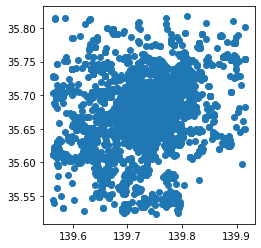

In [44]:
gt_points.plot()